UBITname: sravyapi                       Person #50249282

TASK 1 Fitting Classification Trees 

In [8]:
setwd('/Users/sp/Desktop/574-KK/ML-LAB2')
library(tree)
library (ISLR)
attach (Carseats)
High=ifelse (Sales <=8," No"," Yes ") #if sales>8,high='yes'
Carseats =data.frame(Carseats ,High) #merging 'high' with the carseats data
tree.carseats=tree(High~.-Sales,Carseats)#fit a classification tree inorder to predict high using all variables but sales
summary(tree.carseats) #internal nodes,external nodes,(training) error rate


The following object is masked _by_ .GlobalEnv:

    High

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, High, Income, Population,
    Price, Sales, ShelveLoc, Urban, US

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "High.1"
Number of terminal nodes:  2 
Residual mean deviance:  0 = 0 / 398 
Misclassification error rate: 0 = 0 / 400 

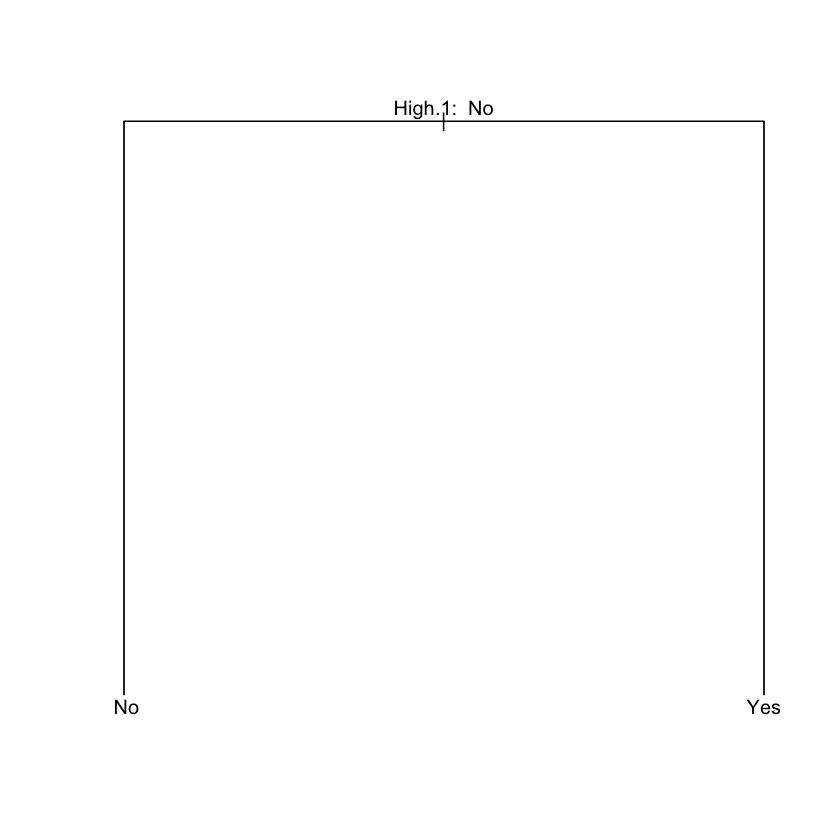

In [9]:
plot(tree.carseats)
text(tree.carseats ,pretty =0)

In [10]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

1) root 400 541.5  No ( 0.59 0.41 )  
  2) High.1:  No 236   0.0  No ( 1.00 0.00 ) *
  3) High.1:  Yes  164   0.0  Yes  ( 0.00 1.00 ) *

In [11]:
#To evaluate the performance of a classification tree,we must estimate test error rather than just training error
set.seed (2)#divide data into training ,testing data sets,build tree using training set and evaluate it on test set.
train = sample (1:nrow(Carseats), 200)
Carseats.test = Carseats [-train,]
High.test = High[-train]
tree.carseats = tree (High~.-Sales, Carseats ,subset = train )
tree.pred = predict (tree.carseats, Carseats.test, type ="class") #type='class' returns the actual class pred
table(tree.pred, High.test) #this approach gives pred upto 71.5% accurate


         High.test
tree.pred  No  Yes 
     No   116     0
     Yes    0    84

$size
[1] 2 1

$dev
[1]  0 80

$k
[1] -Inf   80

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

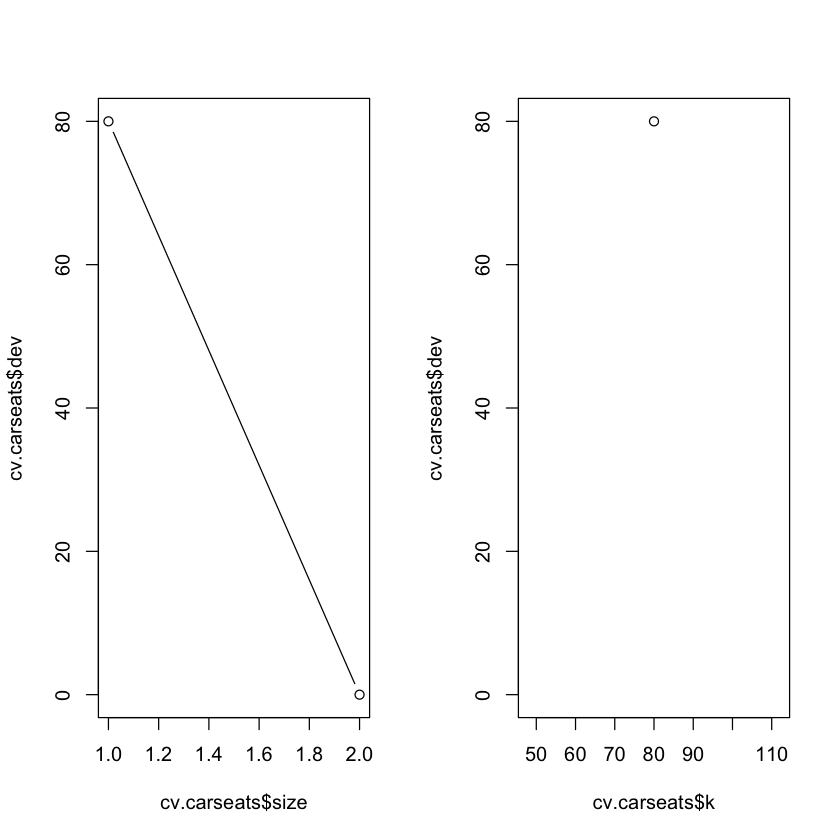

In [12]:
#pruning the tree for improved results
set.seed (3) #cv performs cross val to determine optimal level of tree complexity.cost complexity pruning is used 
cv.carseats =cv.tree(tree.carseats ,FUN=prune.misclass)
cv.carseats
par(mfrow =c(1,2)) 
plot(cv.carseats$size ,cv.carseats$dev ,type="b")
plot(cv.carseats$k ,cv.carseats$dev ,type="b")


Warning message in prune.tree(tree = tree.carseats, best = 9, method = "misclass"):
“best is bigger than tree size”

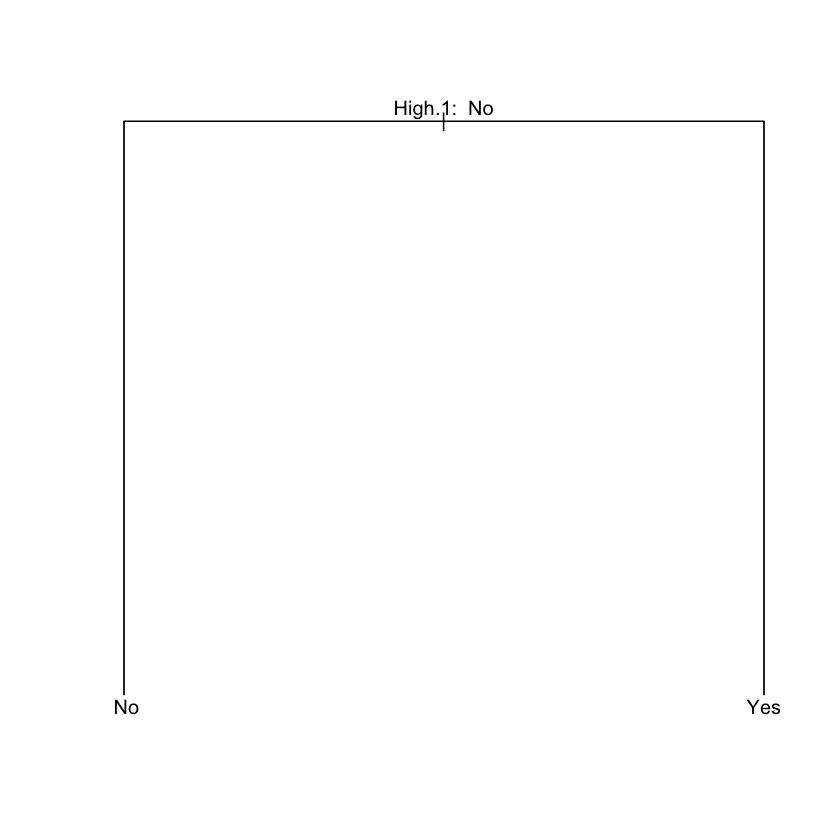

In [13]:
prune.carseats =prune.misclass (tree.carseats ,best =9) #in order to indicate that we want the classification 
plot(prune.carseats )                  #error rate to guide the cross-validation and pruning process,
text(prune.carseats ,pretty =0) #rather than the default for the cv.tree() function

In [14]:

tree.pred=predict(prune.carseats , Carseats.test ,type= "class")
table(tree.pred ,High.test)

#77% of the test observations are correctly classified, so not only has the pruning process produced a 
#more interpretable tree, but it has also improved the classification accuracy

         High.test
tree.pred  No  Yes 
     No   116     0
     Yes    0    84

Warning message in prune.tree(tree = tree.carseats, best = 15, method = "misclass"):
“best is bigger than tree size”

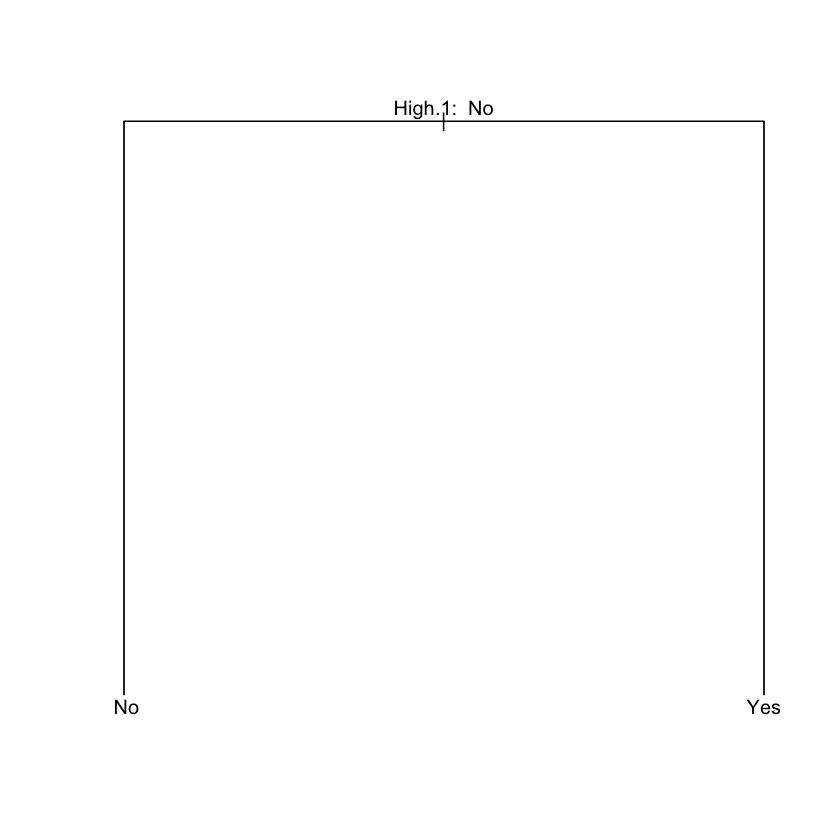

In [16]:
#With increased best value we obtain a larger pruned tree with lower classification accuracy
#74%
prune.carseats =prune.misclass (tree.carseats ,best =15)
#classification accuracy
plot(prune.carseats )
text(prune.carseats ,pretty =0)

In [17]:
tree.pred=predict(prune.carseats , Carseats.test ,type= "class")
table(tree.pred ,High.test)
#The cv.tree() function reports the number of terminal nodes of each tree considered (size) as well as 
#the corresponding error rate and the value of the cost-complexity parameter used (k, which corresponds to α

         High.test
tree.pred  No  Yes 
     No   116     0
     Yes    0    84

TASK 2 Fitting Regression Trees

#Here we fit a regression tree to the Boston data set. 
#First, we create atraining set, and fit the tree to the training data.

In [19]:
setwd('/Users/sp/Desktop/574-KK/ML-LAB2')
library (MASS)
Boston = read.csv("Boston.csv")
set.seed (1)
train = sample (1: nrow(Boston), nrow(Boston)/2)
tree.boston =tree(medv~.,Boston ,subset =train)
summary (tree.boston ) #The variable lstat measures the percentage of individuals with lower socioeconomic status.
#In the context of a regression tree, the deviance is simply the sum of squared errors for the tree.


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

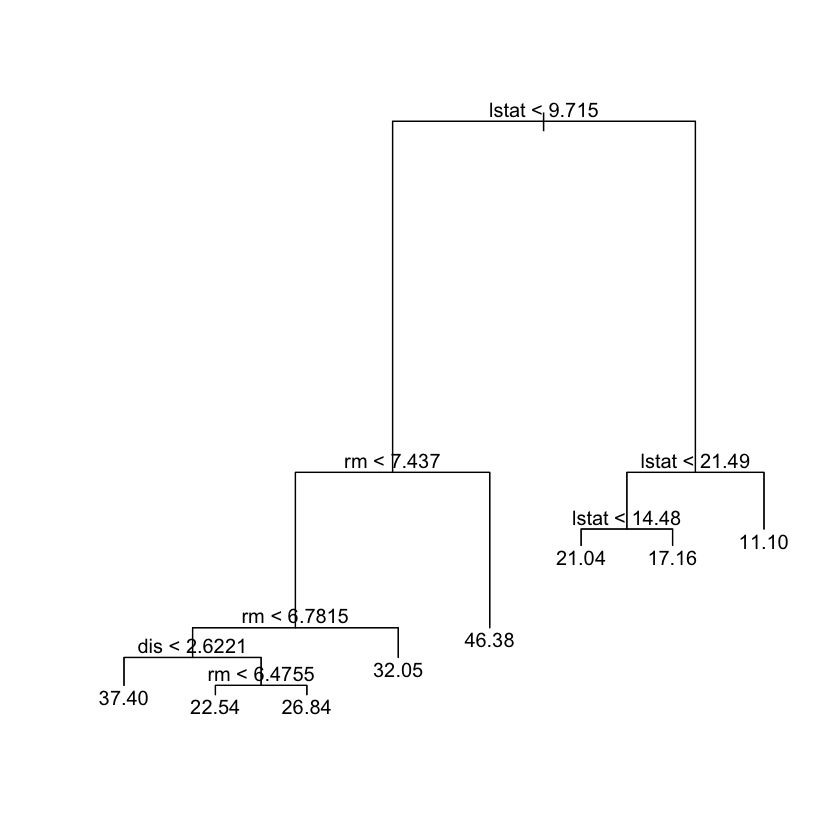

In [20]:
plot(tree.boston)
text(tree.boston,pretty =0)

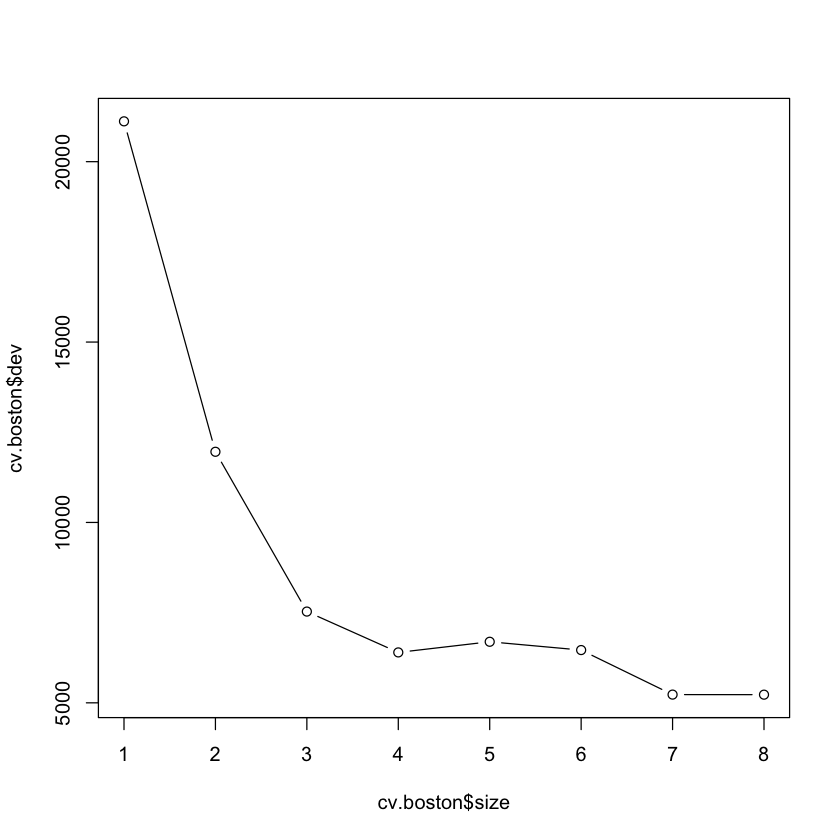

In [21]:
#use the cv.tree() function to see whether pruning the tree will improve performance.
cv.boston =cv.tree(tree.boston )
plot(cv.boston$size ,cv.boston$dev ,type='b')

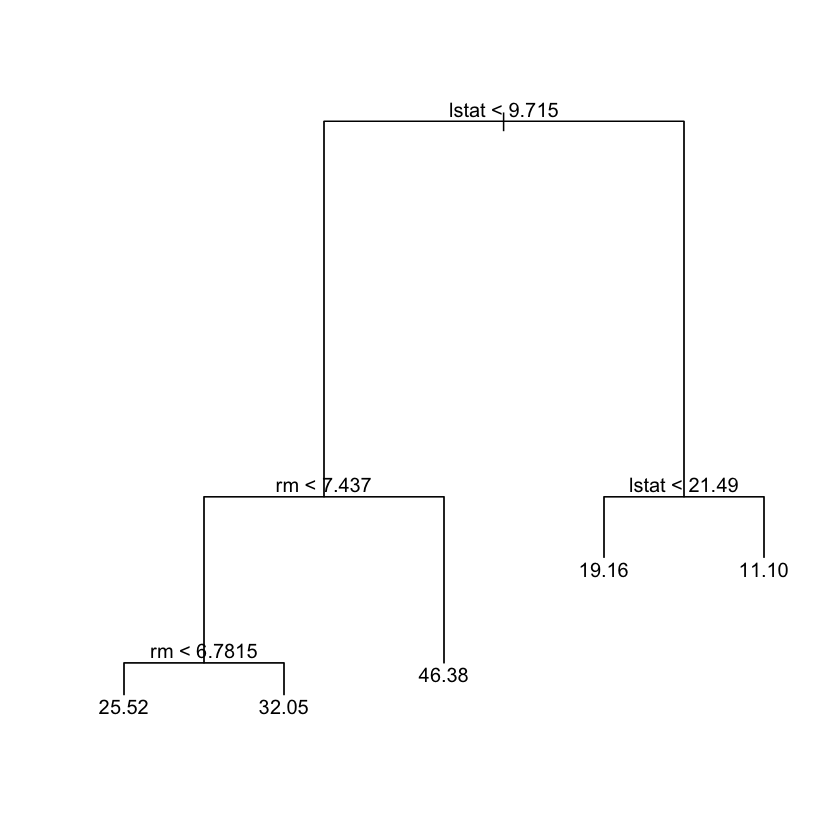

In [22]:
#In this case, the most complex tree is selected by cross-validation. However,
#if we wish to prune the tree, we could do so as follows, using the prune.tree() function

prune.boston =prune.tree(tree.boston ,best =5)
plot(prune.boston)
text(prune.boston,pretty =0)

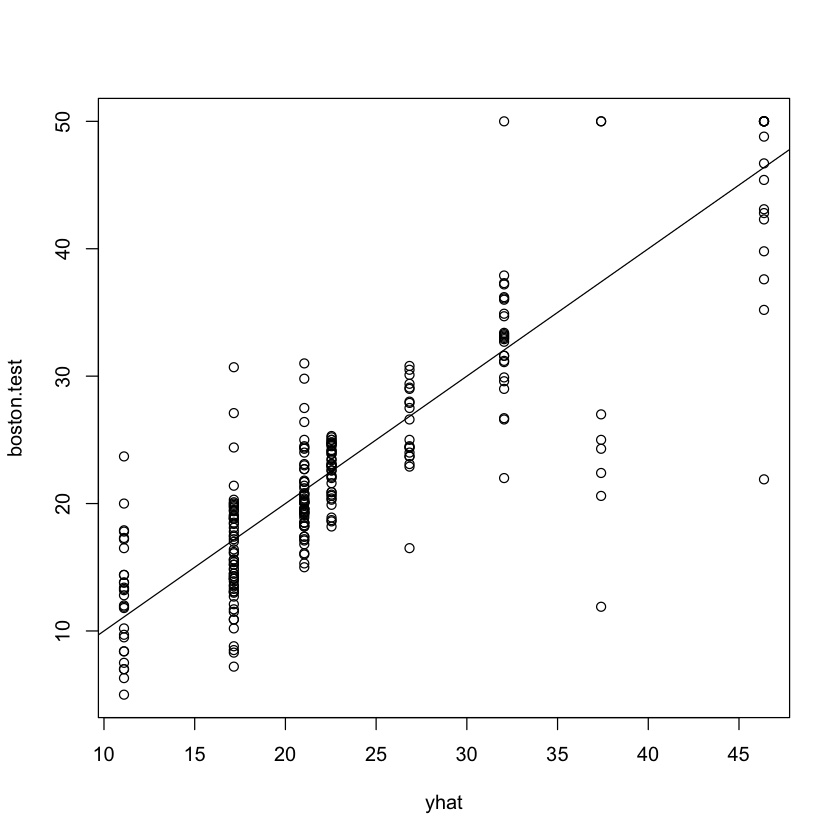

In [23]:
#In keeping with the cross-validation results, we use the unpruned tree to make predictions on the test set

yhat= predict(tree.boston ,newdata = Boston [-train ,])
boston.test= Boston[-train ,"medv"]
plot(yhat,boston.test)
abline (0,1)


In [24]:
mean((yhat-boston.test)^2)

[1] 25.04559

In other words, the test set MSE associated with the regression tree is 25.05. 
The square root of the MSE is therefore around 5.005, indicating that this model leads to test predictions that 
are within around $5,005 of the true median home value for the suburb.

TASK 3 Bagging and Random Forests

In [26]:
setwd('/Users/sp/Desktop/574-KK/ML-LAB2')
Boston = read.csv("Boston.csv")
#bagging is simply a special case of a random forest with m = p.

In [27]:
library (randomForest)
set.seed (1)
train = sample (1: nrow(Boston), nrow(Boston)/2) #
bag.boston =randomForest(medv~.,data=Boston ,subset = train, mtry=13, importance =TRUE)
bag.boston
#The argument mtry=13 indicates that all 13 predictors should be considered
#for each split of the tree—in other words, that bagging should be done

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.08966
                    % Var explained: 86.57

[1] 13.33831

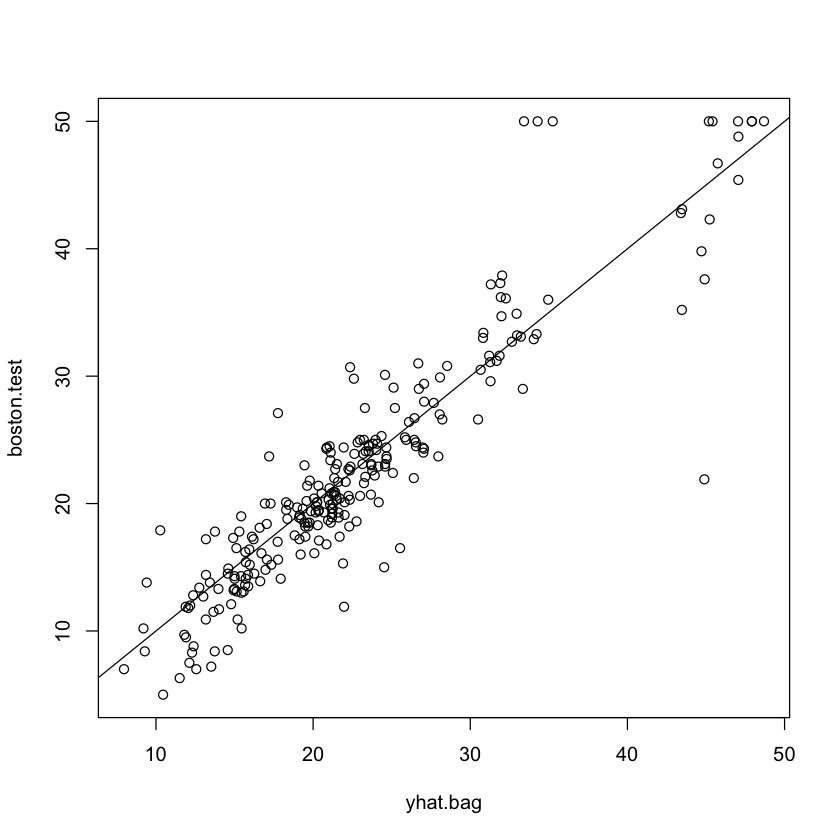

In [28]:
#bagged model performance on the test set
yhat.bag = predict (bag.boston , newdata =Boston [-train ,])
boston.test= Boston[-train ,"medv"] #
plot(yhat.bag , boston.test)
abline (0,1)
mean(( yhat.bag -boston.test)^2)

The test set MSE associated with the bagged regression tree is 13.3383120045074, almost half that obtained using an optimally-pruned single tree. We could change the number of trees grown by randomForest() using the ntree argument:

In [30]:
bag.boston =randomForest(medv~.,data=Boston ,subset =train ,mtry=13, ntree =25)
yhat.bag = predict (bag.boston ,newdata =Boston [-train ,])
mean(( yhat.bag -boston.test)^2)

[1] 15.96786

Growing a random forest proceeds in exactly the same way, except that
we use a smaller value of the mtry argument. By default, randomForest()
uses p/3 variables when building a random forest of regression trees, and
√p variables when building a random forest of classification trees. Here we
use mtry = 6

In [31]:
set.seed (1)
rf.boston =randomForest(medv~.,data=Boston ,subset =train ,mtry=6, importance =TRUE)
yhat.rf = predict (rf.boston ,newdata =Boston [-train ,])
mean(( yhat.rf -boston.test)^2)

[1] 11.48022

The test set MSE is 11.4802165416298; this indicates that random forests yielded an
improvement over bagging in this case.

In [32]:
#Using the importance() function, we can view the importance of each importance() variable.
importance (rf.boston )

,%IncMSE,IncNodePurity
crim,12.547772,1094.65382
zn,1.375489,64.40060
indus,9.304258,1086.09103
chas,2.518766,76.36804
nox,12.835614,1008.73703
rm,31.646147,6705.02638
age,9.970243,575.13702
dis,12.774430,1351.01978
rad,3.911852,93.78200
tax,7.624043,453.19472


Two measures of variable importance are reported. The former is based
upon the mean decrease of accuracy in predictions on the out of bag samples
when a given variable is excluded from the model. The latter is a measure
of the total decrease in node impurity that results from splits over that
variable, averaged over all trees (this was plotted in Figure 8.9). In the
case of regression trees, the node impurity is measured by the training
RSS, and for classification trees by the deviance.

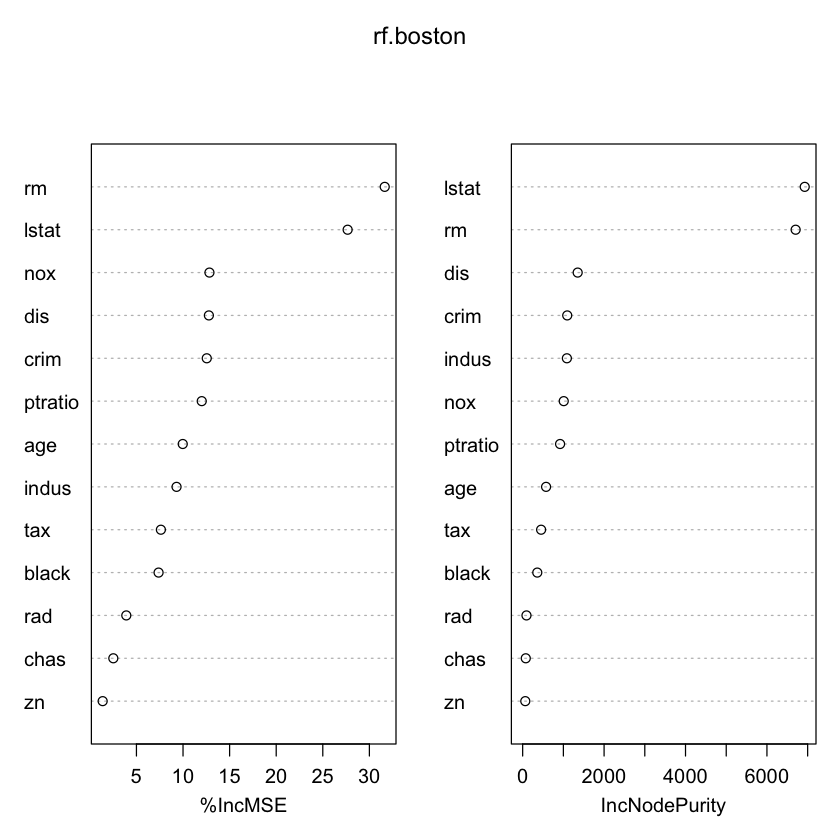

In [33]:
#Plots of these importance measures can be produced using the varImpPlot() function.
varImpPlot (rf.boston )

The results indicate that across all of the trees considered in the random
forest, the wealth level of the community (lstat) and the house size (rm)
are by far the two most important variables

TASK 4 Boosting 

We run gbm() with the option distribution="gaussian" since this is a regression problem
if it were a binary classification problem, we would use distribution="bernoulli".
The argument n.trees=5000 indicates that we want 5000 trees, and the option interaction.depth=4 limits the depth of each tree.

In [34]:
setwd('/Users/sp/Desktop/574-KK/ML-LAB2')
Boston = read.csv("Boston.csv")
library (gbm)
set.seed (1)
train = sample (1: nrow(Boston), nrow(Boston)/2) #
boost.boston =gbm(medv~.,data=Boston [train ,], distribution= "gaussian",n.trees =5000 , interaction.depth =4)

Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


,var,rel.inf
lstat,lstat,45.96792013
rm,rm,31.22018272
dis,dis,6.80567724
crim,crim,4.07534048
nox,nox,2.56586166
ptratio,ptratio,2.26983216
black,black,1.78740116
age,age,1.64495723
tax,tax,1.36917603
indus,indus,1.27052715


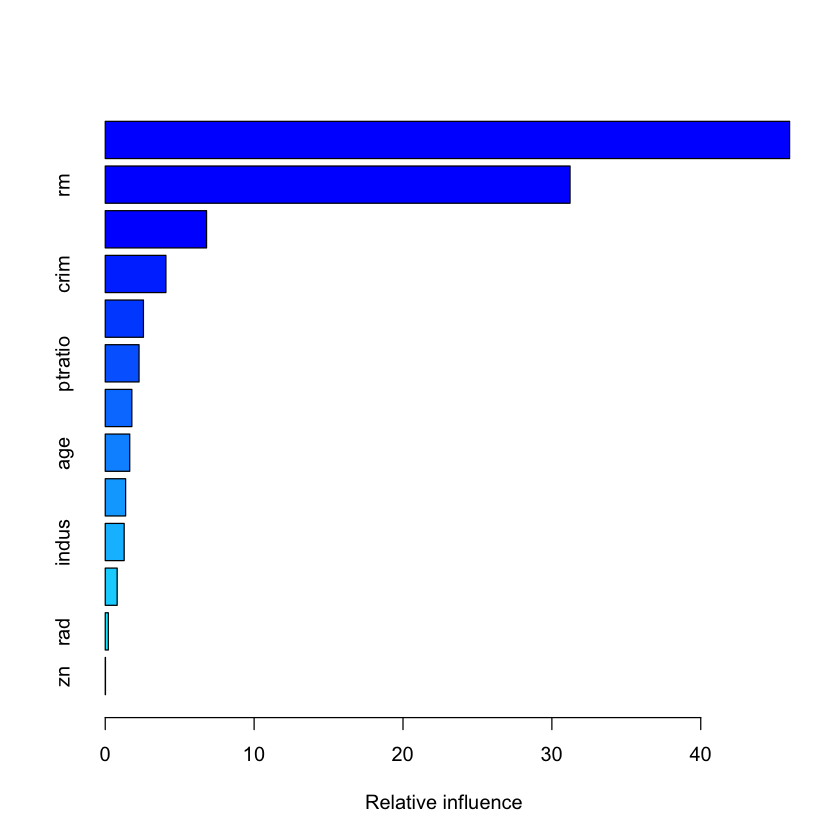

In [35]:
#The summary() function produces a relative influence plot and also outputs the relative influence statistics
summary (boost.boston)

We see that lstat and rm are by far the most important variables. We can also produce partial dependence plots 
for these two variables. These plots illustrate the marginal effect of the selected variables on the response 
after integrating out the other variables. In this case, as we might expect, medianhouse prices are increasing with rm and decreasing with lstat.

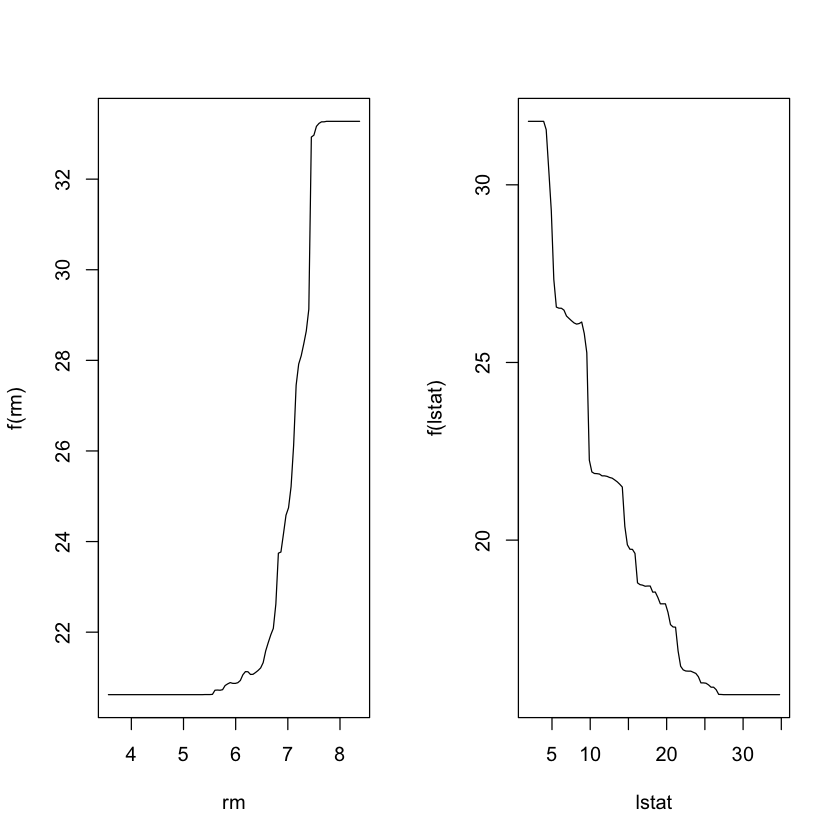

In [37]:
par(mfrow =c(1,2))
plot(boost.boston ,i="rm")
plot(boost.boston ,i="lstat")

In [38]:
#We now use the boosted model to predict medv on the test set:
yhat.boost=predict (boost.boston ,newdata =Boston [-train ,],n.trees =5000)
boston.test= Boston[-train ,"medv"] #
mean(( yhat.boost -boston.test)^2)

[1] 11.84694

The test MSE obtained is 11.8469398169183; similar to the test MSE for random forests
and superior to that for bagging. If we want to, we can perform boosting
with a different value of the shrinkage parameter λ in (8.10). The default
value is 0.001, but this is easily modified. Here we take λ = 0.2

In [39]:
boost.boston =gbm(medv~.,data=Boston [train ,], distribution="gaussian",n.trees =5000 , interaction.depth =4, 
                  shrinkage =0.2,verbose =F)
yhat.boost=predict (boost.boston ,newdata =Boston [-train ,],
n.trees =5000)
mean(( yhat.boost -boston.test)^2)

[1] 11.42312

In this case, using λ = 0.2 leads to a slightly lower test MSE than λ = 0.001.

Summary:

Report time required for homework: 2-6 hours (Which includes reading about decision tree concepts) 

Difficulties encountered         : None

Collaborators                    : None

References                       :

1. YouTube videos: https://www.youtube.com/watch?v=Pz6xX6rK5M4&index=1&list=PLBv09BD7ez_4_UoYeGrzvqveIR_USBEKD
2. An Introduction to Statistical Learning with Applications in R

Platform used: Jupyter Notebook R
Libraries used: "tree","ISLR","MASS","randomForest","gbm"

